In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import seaborn as sns
import random as rnd
import math

In [7]:
dataset = pd.read_csv('dataset/Biomass_History.csv')

<AxesSubplot: >

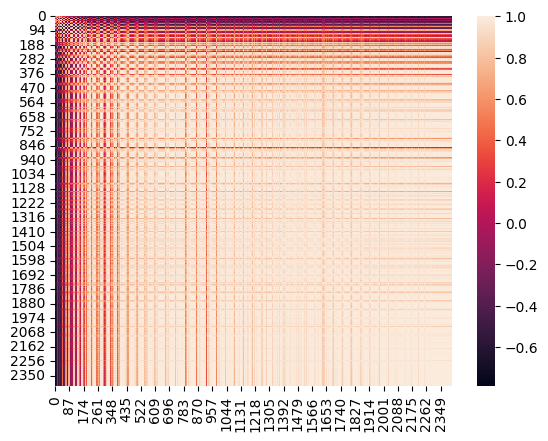

In [10]:
sns.heatmap(np.corrcoef(dataset.values))

In [11]:
print(len(dataset))
dataset = dataset.drop(columns="Index")
dataset[:20]

2418


Latitude  Longitude        2010        2011        2012        2013  \
0   24.66818   71.33144    8.475744    8.868568    9.202181    6.023070   
1   24.66818   71.41106   24.029778   28.551348   25.866415   21.634459   
2   24.66818   71.49069   44.831635   66.111168   56.982258   53.003735   
3   24.66818   71.57031   59.974419   80.821304   78.956543   63.160561   
4   24.66818   71.64994   14.653370   19.327524   21.928144   17.899586   
5   24.66818   71.72956   17.416639   35.811001   26.003826   27.348482   
6   24.66818   71.80919   23.568657   37.371216   38.298550   27.838022   
7   24.66818   71.88882   48.345234   91.215836   91.906342   41.121754   
8   24.66818   71.96844   58.784283   50.206898   60.707321   37.598999   
9   24.66818   72.04807   67.907379   68.375999   87.026680   54.602242   
10  24.66818   72.12769    8.916524   16.679886   21.618805   13.550439   
11  24.66818   72.20732    3.416374    2.891346    3.826416    3.098782   
12  24.66818   72.28694    2.298106    2.165051    1.780242    2.644897   
13  24.66818   72.36657    0.405264    0.146914    0.168368    0.251683   
14  24.58758   71.25181    0.378064    1.557208    0.267738    0.703204   
15  24.58758   71.33144   45.174110   67.934845   58.226315   35.267220   
16  24.58758   71.41106   56.539742   83.333382   81.218788   59.407043   
17  24.58758   71.49069  139.388947  161.756607  149.984787  132.148621   
18  24.58758   71.57031  140.025986  143.676621  105.671814  105.944908   
19  24.58758   71.64994   51.762608   91.464401   90.009483   58.497116   

          2014        2015        2016        2017  
0    10.788374    6.647325    7.387925    5.180296  
1    34.419411   27.361908   40.431847   42.126945  
2    70.917908   42.517117   59.181629   73.203232  
3    93.513924   70.203171   74.536720  101.067352  
4    19.534035   19.165791   16.531315   26.086885  
5    29.599268   22.026114   23.592617   41.749001  
6    40.779961   32.014874   37.771797   55.003929  
7    57.266411   60.263412   72.291153   29.411613  
8    59.462139   38.788315   31.312796   37.497009  
9    78.118126   44.796188   36.008152   52.549976  
10   15.403367    7.133225    7.732000    9.861409  
11    6.333014    4.840425    4.729421    7.909709  
12    5.368379    4.423479    4.019220    7.005911  
13    0.180468    0.131804    0.170856    0.177587  
14    0.319150    0.268468    0.407948    0.952279  
15   55.589840   34.768570   29.412724   26.509066  
16   85.440163   78.999176   94.716049   85.237656  
17  205.142639  130.579208  128.607407  153.976090  
18  175.587204  114.893639  119.686356  167.433884  
19   83.193336   64.630905   60.418457   89.419334

In [91]:
temp_high = [41.5, 42.1, 42.3]
rainfall = [310, 200, 150]
population = [30,20, 38]

In [92]:
z = np.linalg

In [93]:
z.solve([[2,3], [4,5]], [6,7])[0:]

array([-4.5,  5. ])

In [94]:
df = dataset[0:]

df['Temperature coeff'] = 2
df['Rainfall coeff'] = 2
df['Population coeff'] = 2
for i in range(len(df)):
    coeff = [
        [temp_high[0], rainfall[0], population[0]],
        [temp_high[1], rainfall[1], population[1]],
        [temp_high[2], rainfall[2], population[2]]
    ]
    constant = [
        df.iloc[i]['2014'],
        df.iloc[i]['2015'],
        df.iloc[i]['2016']
    ]
    values = z.solve(coeff, constant)
    
    df['Temperature coeff'][i] = values[0]
    df['Rainfall coeff'][i] = values[1]
    df['Population coeff'][i] = values[2]

C:\Users\user\AppData\Local\Temp\ipykernel_12360\2137821823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temperature coeff'] = 2
C:\Users\user\AppData\Local\Temp\ipykernel_12360\2137821823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rainfall coeff'] = 2
C:\Users\user\AppData\Local\Temp\ipykernel_12360\2137821823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [95]:
df

Latitude  Longitude       2010       2011       2012       2013  \
0     24.66818   71.33144   8.475744   8.868568   9.202181   6.023070   
1     24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2     24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3     24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4     24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   
...        ...        ...        ...        ...        ...        ...   
2413  20.15456   72.84432   5.199882   4.516778   4.321080   2.658953   
2414  20.15456   72.92394   0.122287   0.126717   0.101494   0.111509   
2415  20.15456   73.00357   0.039415   0.040843   0.032713   0.035941   
2416  20.15456   73.08319   2.719220   1.370163   0.818687   1.205721   
2417  20.15456   73.16282   0.621228   0.238414   0.112909   0.209801   

           2014       2015       2016        2017  Temperature coeff  \
0     10.788374   6.647325   7.387925    5.180296          -0.025312   
1     34.419411  27.361908  40.431847   42.126945           0.305980   
2     70.917908  42.517117  59.181629   73.203232          -0.266355   
3     93.513924  70.203171  74.536720  101.067352           0.616157   
4     19.534035  19.165791  16.531315   26.086885           0.432792   
...         ...        ...        ...         ...                ...   
2413   5.113997   5.301668   6.419223    5.321604           0.128705   
2414   0.121749   0.122467   0.145785    0.120626           0.002822   
2415   0.039241   0.039473   0.046989    0.038879           0.000910   
2416   1.316443   1.324201   1.576338    1.304297           0.030517   
2417   0.229067   0.230417   0.274289    0.226953           0.005310   

      Rainfall coeff  Population coeff  
0           0.026939          0.116256  
1           0.000102          0.722990  
2           0.137564          1.310889  
3           0.154897          0.664176  
4           0.015529         -0.108031  
...              ...               ...  
2413       -0.005204          0.046200  
2414       -0.000085          0.001029  
2415       -0.000027          0.000332  
2416       -0.000915          0.011126  
2417       -0.000159          0.001936  

[2418 rows x 13 columns]

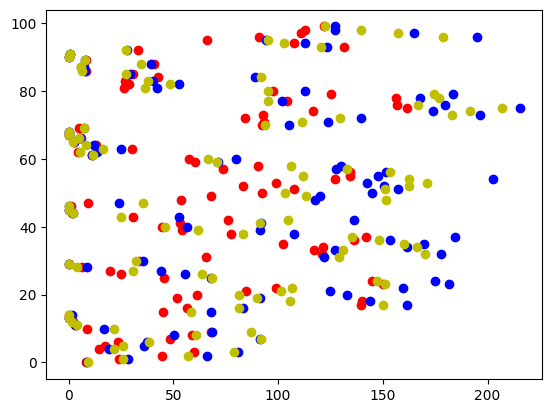

In [111]:
plt.scatter(df['2010'].values[:100], [i for i in range(100)], color='r', )
plt.scatter(df['2011'].values[:100],[i for i in range(100)], color='b', )
plt.scatter(df['2012'].values[:100],[i for i in range(100)], color='y', )

In [96]:
df.corr()

Latitude  Longitude      2010      2011      2012  \
Latitude           1.000000  -0.064417 -0.136819 -0.099965  0.083731   
Longitude         -0.064417   1.000000 -0.053242 -0.035396  0.102585   
2010              -0.136819  -0.053242  1.000000  0.955677  0.745160   
2011              -0.099965  -0.035396  0.955677  1.000000  0.741025   
2012               0.083731   0.102585  0.745160  0.741025  1.000000   
2013              -0.212670  -0.102869  0.911679  0.873130  0.602910   
2014              -0.117105  -0.058215  0.899700  0.925591  0.797913   
2015              -0.100288   0.044491  0.868401  0.859224  0.736927   
2016              -0.051054   0.236909  0.720701  0.734709  0.776136   
2017              -0.121428  -0.071760  0.923268  0.945381  0.689045   
Temperature coeff -0.035842   0.146180  0.443299  0.393134  0.326215   
Rainfall coeff    -0.106853  -0.322940  0.497240  0.540746  0.357955   
Population coeff   0.072540   0.140979 -0.381741 -0.326131 -0.103708   

                       2013      2014      2015      2016      2017  \
Latitude          -0.212670 -0.117105 -0.100288 -0.051054 -0.121428   
Longitude         -0.102869 -0.058215  0.044491  0.236909 -0.071760   
2010               0.911679  0.899700  0.868401  0.720701  0.923268   
2011               0.873130  0.925591  0.859224  0.734709  0.945381   
2012               0.602910  0.797913  0.736927  0.776136  0.689045   
2013               1.000000  0.845815  0.876651  0.668680  0.838596   
2014               0.845815  1.000000  0.850462  0.774110  0.909493   
2015               0.876651  0.850462  1.000000  0.836840  0.815980   
2016               0.668680  0.774110  0.836840  1.000000  0.649236   
2017               0.838596  0.909493  0.815980  0.649236  1.000000   
Temperature coeff  0.528551  0.281573  0.744094  0.532043  0.336864   
Rainfall coeff     0.432062  0.654087  0.223579  0.069984  0.607634   
Population coeff  -0.500896 -0.205770 -0.567423 -0.073923 -0.344841   

                   Temperature coeff  Rainfall coeff  Population coeff  
Latitude                   -0.035842       -0.106853          0.072540  
Longitude                   0.146180       -0.322940          0.140979  
2010                        0.443299        0.497240         -0.381741  
2011                        0.393134        0.540746         -0.326131  
2012                        0.326215        0.357955         -0.103708  
2013                        0.528551        0.432062         -0.500896  
2014                        0.281573        0.654087         -0.205770  
2015                        0.744094        0.223579         -0.567423  
2016                        0.532043        0.069984         -0.073923  
2017                        0.336864        0.607634         -0.344841  
Temperature coeff           1.000000       -0.413678         -0.787118  
Rainfall coeff             -0.413678        1.000000          0.074429  
Population coeff           -0.787118        0.074429          1.000000

AxesSubplot(0.125,0.11;0.62x0.77)


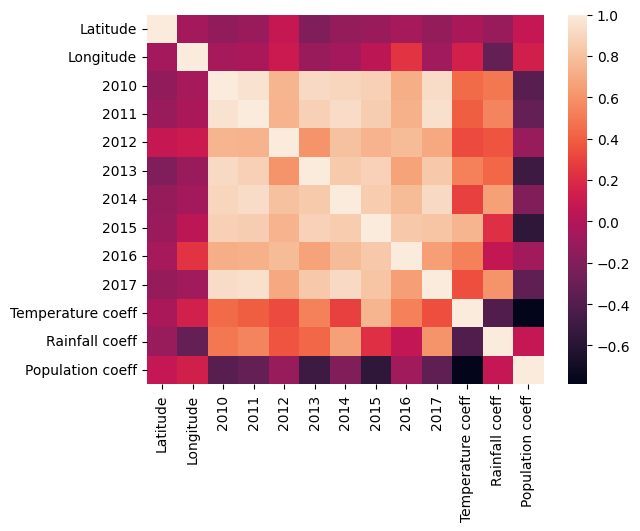

In [97]:
print(sns.heatmap(df.corr(), cbar=True))

In [7]:
df_joy = dataset[0:].drop(columns=['Latitude', 'Longitude',])

In [62]:
df = dataset[0:].drop(columns=['Latitude', 'Longitude', '2012'])

# df['2018'] = y_pred
df['mean'] = 2
arr = [np.mean(df.iloc[i]) for i in range(len(df))]
for i in range(len(df)):
    df['mean'][i] = arr[i] 
    
df['max'] = 2
arr = [max(df.iloc[i]) for i in range(len(df))]
for i in range(len(df)):
    df['max'][i] = arr[i] 
    
df['std'] = 2
arr = [np.std(df.iloc[i]) for i in range(len(df))]
for i in range(len(df)):
    df['std'][i] = arr[i]
    
df
# df['weather 2010'] = np.array([np.mean(dog) for i in range(2418)])
# df['mean'] = [np.mean(dataset.iloc[i]) for i in range(len(dataset))]

C:\Users\user\AppData\Local\Temp\ipykernel_8292\4169888916.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'][i] = arr[i]
C:\Users\user\AppData\Local\Temp\ipykernel_8292\4169888916.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max'][i] = arr[i]
C:\Users\user\AppData\Local\Temp\ipykernel_8292\4169888916.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'][i] = arr[i]


2010       2011       2013       2014       2015       2016  \
0      8.475744   8.868568   6.023070  10.788374   6.647325   7.387925   
1     24.029778  28.551348  21.634459  34.419411  27.361908  40.431847   
2     44.831635  66.111168  53.003735  70.917908  42.517117  59.181629   
3     59.974419  80.821304  63.160561  93.513924  70.203171  74.536720   
4     14.653370  19.327524  17.899586  19.534035  19.165791  16.531315   
...         ...        ...        ...        ...        ...        ...   
2413   5.199882   4.516778   2.658953   5.113997   5.301668   6.419223   
2414   0.122287   0.126717   0.111509   0.121749   0.122467   0.145785   
2415   0.039415   0.040843   0.035941   0.039241   0.039473   0.046989   
2416   2.719220   1.370163   1.205721   1.316443   1.324201   1.576338   
2417   0.621228   0.238414   0.209801   0.229067   0.230417   0.274289   

            2017       2018       mean         max        std  
0       5.180296   9.470706   7.204668   10.788374   2.467323  
1      42.126945  34.231586  28.309698   42.126945  11.036526  
2      73.203232  57.254777  52.113467   73.203232  19.382100  
3     101.067352  78.352575  69.292225  101.067352  25.954904  
4      26.086885  20.694871  17.321486   26.086885   6.128961  
...          ...        ...        ...         ...        ...  
2413    5.321604   6.383399   4.768389    6.419223   1.377880  
2414    0.120626   0.144135   0.335031    2.000000   0.716034  
2415    0.038879   0.089692   0.263386    2.000000   0.746914  
2416    1.304297   1.459084   1.586163    2.719220   0.526623  
2417    0.226953   0.224688   0.472762    2.000000   0.665955  

[2418 rows x 11 columns]

In [66]:
df1 = dataset[0:].drop(columns=['Latitude', 'Longitude', '2012'])
df1['mean'] = 2
arr1 = [np.mean(df1.iloc[i]) for i in range(len(df1))]
for i in range(len(df1)):
    df1['mean'][i] = arr1[i] 
    
df1['max'] = 2
arr = [max(df1.iloc[i]) for i in range(len(df1))]
for i in range(len(df1)):
    df1['max'][i] = arr[i] 
    
df1['std'] = 2
arr = [np.std(df1.iloc[i]) for i in range(len(df1))]
for i in range(len(df1)):
    df1['std'][i] = arr[i]
    
# df1['weather 2010'] = np.array([np.mean(dog) for i in range(2418)])

C:\Users\user\AppData\Local\Temp\ipykernel_8292\3343770077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mean'][i] = arr1[i]
C:\Users\user\AppData\Local\Temp\ipykernel_8292\3343770077.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['max'][i] = arr[i]
C:\Users\user\AppData\Local\Temp\ipykernel_8292\3343770077.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['std'][i] = arr[i]


<AxesSubplot: >

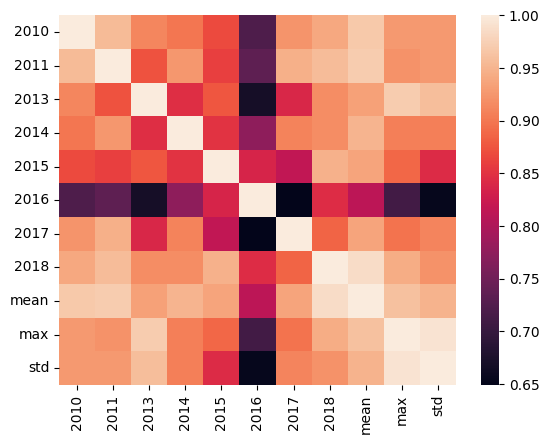

In [67]:
sns.heatmap(df.corr(), cbar=True)

In [68]:
X = df.values
Y = dataset['2017'].values

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [70]:
# rd = MLPRegressor(hidden_layer_sizes=(128,256), alpha=0.025, max_iter=15000)
# # rd = RandomForestRegressor()

# rd.fit(X, Y)
X_test = df1.values
X_test.shape

# y_test = df_joy['2017'].values

y_pred = rd.predict(X_test)
sum(y_pred)

324182.92283874605

In [71]:
data = {
    "Predictions": y_pred
}

ds = pd.DataFrame(data)
ds

Predictions
0        8.988136
1       34.199804
2       53.906308
3       78.020294
4       19.757463
...           ...
2413     6.435133
2414     0.139485
2415     0.087499
2416     2.175005
2417     0.330645

[2418 rows x 1 columns]

In [59]:
dataset

Latitude  Longitude       2010       2011       2012       2013  \
0     24.66818   71.33144   8.475744   8.868568   9.202181   6.023070   
1     24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2     24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3     24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4     24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   
...        ...        ...        ...        ...        ...        ...   
2413  20.15456   72.84432   5.199882   4.516778   4.321080   2.658953   
2414  20.15456   72.92394   0.122287   0.126717   0.101494   0.111509   
2415  20.15456   73.00357   0.039415   0.040843   0.032713   0.035941   
2416  20.15456   73.08319   2.719220   1.370163   0.818687   1.205721   
2417  20.15456   73.16282   0.621228   0.238414   0.112909   0.209801   

           2014       2015       2016        2017  
0     10.788374   6.647325   7.387925    5.180296  
1     34.419411  27.361908  40.431847   42.126945  
2     70.917908  42.517117  59.181629   73.203232  
3     93.513924  70.203171  74.536720  101.067352  
4     19.534035  19.165791  16.531315   26.086885  
...         ...        ...        ...         ...  
2413   5.113997   5.301668   6.419223    5.321604  
2414   0.121749   0.122467   0.145785    0.120626  
2415   0.039241   0.039473   0.046989    0.038879  
2416   1.316443   1.324201   1.576338    1.304297  
2417   0.229067   0.230417   0.274289    0.226953  

[2418 rows x 10 columns]

In [72]:
ds.to_csv('pred_2.csv', index=False)